In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import scipy

In [2]:
# Especifica los nombres de las columnas
columnas = [
    "ani",
    "sub_tipo_cliente_de",
    "cei_dias_con_trafico_ca",
    "cei_ind_experiencia_datos_nr",
    "cei_ind_experiencia_total_nr",
    "cei_porcentaje_score_60_nr",
    "arpu_negocio_promedio_mo",
    "q_sitios",
    "q_sitios_rutas",
    "fna",
    "nps_score",
    "nps_rec"
]

# Importa el archivo CSV sin encabezados
data = pd.read_csv('Corr.csv', delimiter=';', header=None, names=columnas)
data['q_sitios_rutas'] = data['q_sitios_rutas'].fillna(0)

data


,ani,sub_tipo_cliente_de,cei_dias_con_trafico_ca,cei_ind_experiencia_datos_nr,cei_ind_experiencia_total_nr,cei_porcentaje_score_60_nr,arpu_negocio_promedio_mo,q_sitios,q_sitios_rutas,fna,nps_score,nps_rec
0,1120003000,Empresas Resto,20,3,63,4,6723.90,6,0,NaN,NaN,NaN
1,1120004000,Negocios Emprendedor,30,25,79,2,1179.00,80,1,RN 0226,NaN,NaN
2,1120009500,Empresas Resto,21,2,54,1,1403.00,1,0,NaN,NaN,NaN
3,1120009600,Empresas Resto,19,2,60,0,1403.00,3,0,NaN,NaN,NaN
4,1120023673,Empresas Resto,2,5,92,0,1403.00,50,2,RN 0001/RN A001,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
973116,3888583495,Empresas Top,3,17,85,0,2265.56,3,2,RN 0009/RN 0066,NaN,NaN
973117,3888585245,Negocios Premium,24,0,55,1,1373.23,5,2,RN 0034/RN 0066,NaN,NaN
973118,3888620558,Negocios TOP2,30,28,72,4,2383.23,70,12,RN 0007/RN 0009/RN 0034/RN 0051/RN 0066/RN 006...,NaN,NaN
973119,3888624501,Negocios Premium,30,42,74,1,1373.23,10,5,RN 0007/RN 0026/RN 0034/RN 0066/RN 1V66,NaN,NaN


In [3]:
# Agregar el flag para indicar si NVL(q_sitios_rutas, 0) > 0
data['flag_q_sitios_rutas'] = np.where(data['q_sitios_rutas'].fillna(0) > 0, 1, 0)

# Agrupar por sub_tipo_cliente_de, nps_rec y flag_q_sitios_rutas y calcular la cantidad, media y mediana de anis y nps_score
grouped = data.groupby(['sub_tipo_cliente_de', 'nps_rec', 'flag_q_sitios_rutas']).agg({'ani': 'count', 'nps_score': ['mean', 'median']})

print("Agrupación por sub_tipo_cliente_de, nps_rec y flag_q_sitios_rutas:")
print(grouped)
grouped = grouped.reset_index()
grouped['ani'] = grouped['ani'].astype(int)
grouped.to_csv('Agrupado.csv', index=False)

Agrupación por sub_tipo_cliente_de, nps_rec y flag_q_sitios_rutas:
                                                       ani  nps_score       
                                                     count       mean median
sub_tipo_cliente_de  nps_rec     flag_q_sitios_rutas                        
Empresas Gobierno    Detractores 1                       2   2.500000    2.5
Empresas Resto       Detractores 1                       2   1.000000    1.0
Mayorista Carriers   Detractores 1                       1   0.000000    0.0
Negocios Emprendedor Detractores 0                      21   2.238095    1.0
                                 1                     289   2.470588    2.0
                     Pasivos     0                      12   7.666667    8.0
                                 1                     139   7.597122    8.0
                     Promotores  0                      33   9.727273   10.0
                                 1                     204   9.549020   10.0
Negocios 

In [4]:
data[data['nps_rec'].notna()]


,ani,sub_tipo_cliente_de,cei_dias_con_trafico_ca,cei_ind_experiencia_datos_nr,cei_ind_experiencia_total_nr,cei_porcentaje_score_60_nr,arpu_negocio_promedio_mo,q_sitios,q_sitios_rutas,fna,nps_score,nps_rec,flag_q_sitios_rutas
1813,1121891561,Negocios Emprendedor,30,25,79,1,487.00,29,3,RN 0001/RN A001/RN A004,1.0,Detractores,1
1847,1121900267,Negocios Emprendedor,30,32,67,3,2031.38,45,3,RN 0003/RN 0205/RN A002,1.0,Detractores,1
1881,1121918164,Negocios Emprendedor,30,29,74,11,1674.75,291,6,RN 0003/RN 0005/RN 0007/RN 0009/RN A001/RN A003,0.0,Detractores,1
2117,1122230556,Negocios Emprendedor,30,19,68,4,1420.00,28,0,NaN,2.0,Detractores,0
5919,1122424207,Negocios Premium,30,27,78,2,2104.50,153,16,RN 0001/RN 0008/RN 0009/RN 0012/RN 0014/RN 003...,0.0,Detractores,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
971492,3875962324,Negocios Premium,30,23,76,1,5276.46,51,13,RN 0007/RN 0008/RN 0009/RN 0011/RN 0012/RN 002...,8.0,Pasivos,1
972467,3884365346,Negocios Emprendedor,30,35,79,3,10748.03,172,2,RN 0001/RN A001,6.0,Detractores,1
972502,3884702203,Negocios Emprendedor,30,22,75,2,974.00,33,6,RN 0007/RN 0009/RN 0034/RN 0066/RN 0151/RN 1V66,9.0,Promotores,1
972590,3884889361,Empresas Gobierno,29,21,78,1,2350.00,34,5,RN 0009/RN 0022/RN 0034/RN 0066/RN 1V66,5.0,Detractores,1


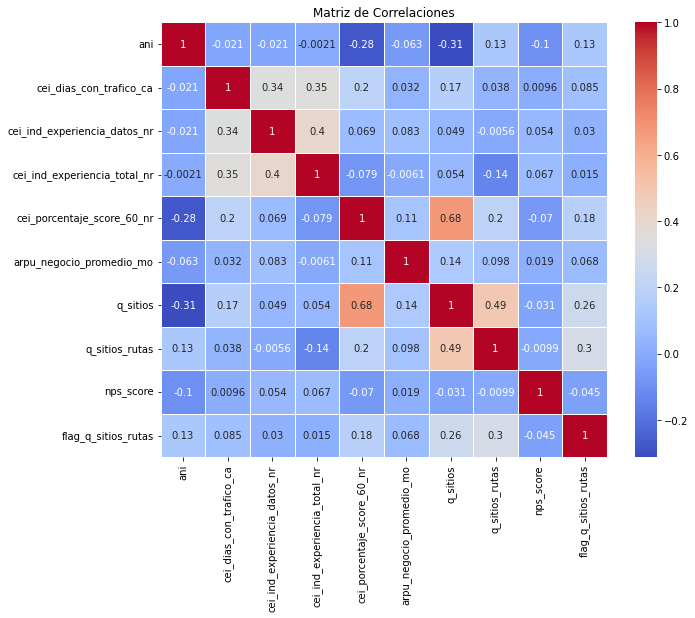

In [5]:
# Calcula la matriz de correlaciones
correlation_matrix = data[data['nps_rec'].notna()].corr()

# Genera el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()